# Airbnb listings Data Cleaning project

In [1]:
import numpy as np
import pandas as pd

In [2]:
price=pd.read_csv('airbnb_price.csv')

In [3]:
price.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [4]:
rt=pd.read_excel('airbnb_room_type.xlsx')
rt.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [5]:
review=pd.read_csv('airbnb_last_review.tsv', sep='\t')
review.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [6]:
# Cleaning airbnb_price data

In [7]:
price

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"
...,...,...,...
25204,36425863,129 dollars,"Manhattan, Upper East Side"
25205,36427429,45 dollars,"Queens, Flushing"
25206,36438336,235 dollars,"Staten Island, Great Kills"
25207,36442252,100 dollars,"Bronx, Mott Haven"


In [8]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [9]:
x=price['nbhood_full'].str.split(',', expand=True)
x

,0,1,2
0,Manhattan,Midtown,None
1,Brooklyn,Clinton Hill,None
2,Manhattan,Murray Hill,None
3,Manhattan,Hell's Kitchen,None
4,Manhattan,Chinatown,None
...,...,...,...
25204,Manhattan,Upper East Side,None
25205,Queens,Flushing,None
25206,Staten Island,Great Kills,None
25207,Bronx,Mott Haven,None


In [10]:
price['borough']=x[0]
price['nbhood']=x[1]

In [11]:
price

,listing_id,price,nbhood_full,borough,nbhood
0,2595,225 dollars,"Manhattan, Midtown",Manhattan,Midtown
1,3831,89 dollars,"Brooklyn, Clinton Hill",Brooklyn,Clinton Hill
2,5099,200 dollars,"Manhattan, Murray Hill",Manhattan,Murray Hill
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Manhattan,Hell's Kitchen
4,5238,150 dollars,"Manhattan, Chinatown",Manhattan,Chinatown
...,...,...,...,...,...
25204,36425863,129 dollars,"Manhattan, Upper East Side",Manhattan,Upper East Side
25205,36427429,45 dollars,"Queens, Flushing",Queens,Flushing
25206,36438336,235 dollars,"Staten Island, Great Kills",Staten Island,Great Kills
25207,36442252,100 dollars,"Bronx, Mott Haven",Bronx,Mott Haven


In [12]:
price.drop(columns='nbhood_full',axis=1, inplace=True)

In [13]:
price

,listing_id,price,borough,nbhood
0,2595,225 dollars,Manhattan,Midtown
1,3831,89 dollars,Brooklyn,Clinton Hill
2,5099,200 dollars,Manhattan,Murray Hill
3,5178,79 dollars,Manhattan,Hell's Kitchen
4,5238,150 dollars,Manhattan,Chinatown
...,...,...,...,...
25204,36425863,129 dollars,Manhattan,Upper East Side
25205,36427429,45 dollars,Queens,Flushing
25206,36438336,235 dollars,Staten Island,Great Kills
25207,36442252,100 dollars,Bronx,Mott Haven


In [14]:
price['price']=price['price'].str.replace('dollars',' ').astype(float)

In [15]:
price

,listing_id,price,borough,nbhood
0,2595,225.0,Manhattan,Midtown
1,3831,89.0,Brooklyn,Clinton Hill
2,5099,200.0,Manhattan,Murray Hill
3,5178,79.0,Manhattan,Hell's Kitchen
4,5238,150.0,Manhattan,Chinatown
...,...,...,...,...
25204,36425863,129.0,Manhattan,Upper East Side
25205,36427429,45.0,Queens,Flushing
25206,36438336,235.0,Staten Island,Great Kills
25207,36442252,100.0,Bronx,Mott Haven


In [16]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   listing_id  25209 non-null  int64  
 1   price       25209 non-null  float64
 2   borough     25209 non-null  object 
 3   nbhood      25209 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 787.9+ KB


In [17]:
price.describe()

,listing_id,price
count,2.520900e+04,25209.000000
mean,2.068922e+07,141.777936
std,1.102928e+07,147.349137
min,2.595000e+03,0.000000
25%,1.202273e+07,69.000000
50%,2.234391e+07,105.000000
75%,3.037669e+07,175.000000
max,3.645581e+07,7500.000000


In [18]:
price.isna().sum()

listing_id    0
price         0
borough       0
nbhood        0
dtype: int64

In [19]:
price.duplicated(['listing_id']).sum()

0

<Axes: >

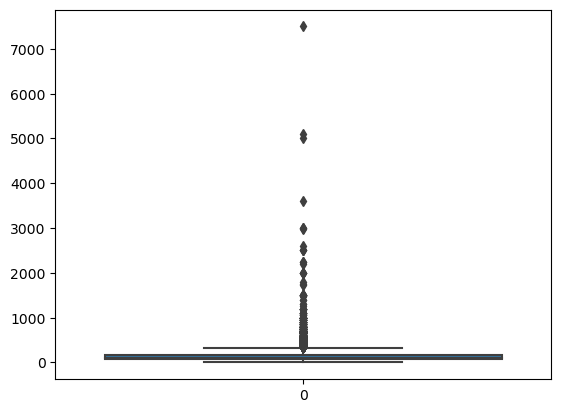

In [20]:
import seaborn as sns
sns.boxplot(data=price['price'])

<Axes: >

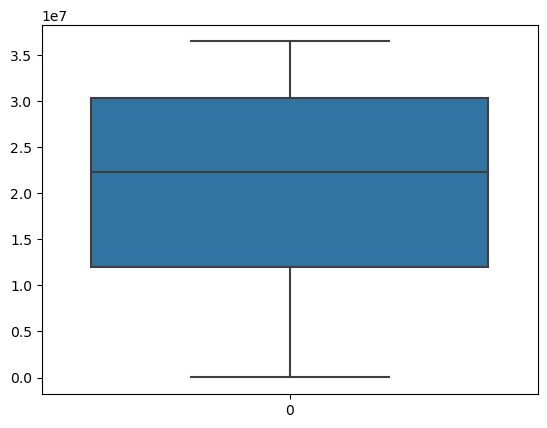

In [21]:
sns.boxplot(data=price['listing_id'])

In [22]:
price['nbhood'].value_counts()

 Bedford-Stuyvesant    2209
 Williamsburg          1853
 Harlem                1435
 Bushwick              1202
 Hell's Kitchen        1119
                       ... 
 Lighthouse Hill          1
 Co-op City               1
 Little Neck              1
 Howland Hook             1
 Prince's Bay             1
Name: nbhood, Length: 216, dtype: int64

In [23]:
price['borough'].value_counts()

Brooklyn         10466
Manhattan        10322
Queens            3456
Bronx              698
Staten Island      267
Name: borough, dtype: int64

In [24]:
# Cleaning airbnb room type dataset

In [25]:
rt.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [26]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [27]:
rt.shape

(25209, 3)

In [28]:
rt['description'].mode()

0                 Home away from home
1    Loft Suite @ The Box House Hotel
Name: description, dtype: object

In [29]:
rt.isna().sum()

listing_id      0
description    10
room_type       0
dtype: int64

In [30]:
rt['description'].fillna(value='Home away from home', inplace=True)

In [31]:
rt.isna().sum()

listing_id     0
description    0
room_type      0
dtype: int64

In [32]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25209 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [33]:
rt['room_type'].value_counts()

Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: room_type, dtype: int64

In [34]:
rt['room_type']=rt['room_type'].str.replace('entire home/apt','Entire home/apt')
rt['room_type']=rt['room_type'].str.replace('ENTIRE HOME/APT', 'Entire home/apt')
rt['room_type']=rt['room_type'].str.replace('private room', 'Private room')
rt['room_type']=rt['room_type'].str.replace('PRIVATE ROOM', 'Private room')
rt['room_type']=rt['room_type'].str.replace('shared room', 'Shared room')
rt['room_type']=rt['room_type'].str.replace('SHARED ROOM', 'Shared room')

In [35]:
rt['room_type'].value_counts()

Entire home/apt    13266
Private room       11356
Shared room          587
Name: room_type, dtype: int64

In [36]:
# Cleaning airbnb review dataset

In [37]:
review.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [38]:
review.shape

(25209, 3)

In [39]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [40]:
y=review['last_review'].str.split(' ', expand=True)
y

,0,1,2
0,May,21,2019
1,July,05,2019
2,June,22,2019
3,June,24,2019
4,June,09,2019
...,...,...,...
25204,July,07,2019
25205,July,07,2019
25206,July,07,2019
25207,July,07,2019


In [41]:
review['month']=y[0]

In [42]:
review.head()

,listing_id,host_name,last_review,month
0,2595,Jennifer,May 21 2019,May
1,3831,LisaRoxanne,July 05 2019,July
2,5099,Chris,June 22 2019,June
3,5178,Shunichi,June 24 2019,June
4,5238,Ben,June 09 2019,June


In [43]:
review['month'].value_counts()

June        12601
July         4725
May          3697
April        1456
January      1440
March         820
February      470
Name: month, dtype: int64

In [44]:
# Combinig the three datasets

In [45]:
listings=pd.merge(price,rt, on='listing_id')
listings=pd.merge(listings,review,on='listing_id')

In [46]:
listings.head()

,listing_id,price,borough,nbhood,description,room_type,host_name,last_review,month
0,2595,225.0,Manhattan,Midtown,Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019,May
1,3831,89.0,Brooklyn,Clinton Hill,Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019,July
2,5099,200.0,Manhattan,Murray Hill,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019,June
3,5178,79.0,Manhattan,Hell's Kitchen,Large Furnished Room Near B'way,Private room,Shunichi,June 24 2019,June
4,5238,150.0,Manhattan,Chinatown,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019,June


In [47]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25209 entries, 0 to 25208
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   listing_id   25209 non-null  int64  
 1   price        25209 non-null  float64
 2   borough      25209 non-null  object 
 3   nbhood       25209 non-null  object 
 4   description  25209 non-null  object 
 5   room_type    25209 non-null  object 
 6   host_name    25201 non-null  object 
 7   last_review  25209 non-null  object 
 8   month        25209 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.9+ MB


In [48]:
#listings.to_excel('listings.xlsx')